### Data Source
[Renewable Energy and Electricity Demand Time Series Dataset with Exogenous Variables at 5-minute Interval - Mendeley Data Links to an external site.](https://data.mendeley.com/datasets/fdfftr3tc2/1)

### Data Description
The database.csv was created using data obtained from the California Independent System Operator (CAISO) and the National Renewable Energy Laboratory (NREL). All data was collected at five-minute intervals, and subsequently cleaned and modified to create a database comprising three time series: solar energy production, wind energy production, and electricity demand. The database contains 12 columns:

1. datetime
2. station (1: Winter, 2: Spring, 3: Summer, 4: Autumn)
3. day of the week (0: Monday, ... , 6: Sunday)
4. DHI (W/m2)
5. DNI (W/m2)
6. GHI (W/m2)
7. wind speed (m/s)
8. humidity (%)
9. temperature (degrees)
10. solar energy production (MW)
11. wind energy production (MW)
12. electricity demand (MW)

### Research Question
Can electricity shortages be proactively planned for using multi-year measured data on solar power generation, wind energy output, and electricity demand?

### Expected Result
- Model results answering the possibility of proactive planning 
- Identification of recurring patterns that precedes electricity shortages
- Predictive models with forecasting supply-demand gaps in the future


### Exploratory Data Analysis
1. Initial Data was clean, no missing values and no duplicate.
2. First column was just an index which was not needed for analysis, it was was removed.
3. Change the string value time with "T" in the value to a true date time value.
4. Renamed the columns for easier reference
5. Created a histogram of a key features excluding features describing time to see how each feature data is distributed and see if there are outliers.
    1.  There are a lot of 0's for DHI, DNI and GHI which also reflected with solar production distribution due to when sun rises and sets.
6. Correlation heatmap was created to see what correlation there are among the fields.
    1.  the target field (electric_demand) is not much correlated to any fields which to me is surprising because as there are more heat (hot), I'd think more electric demand would be there, but possibly the location of measurement is not as hot and retaining normal temperature and using electricity is not necessarily correlated to the heat being within the range of tolerable temperature for people.  
    2.  DHI, DNI and GHI are looking very correlated to the solar production which means that all those fields may not be needed to train the model as they are highly correlated to reduce the computational resource when training.
    3.  It also is surprising to see the wind feature is more correlated with solar production than the wind production.
    d.  Humidity is also highly correlated to the solar features, but much less with wind.
7.  Timeseries plot was created for solar and wind production and electricity demand to see if there is a pattern.
    1.  As expected, electricity demands go up during the summer time.
    2.  Sum of solar and wind production do not provide enough coverage for the electricity demends recorded in this dataset meaning that there are other energy source covering the shortage.
    3.  To not to have 100% shortage as it shows in the electric shortage graph, there would be assumed external energy source covering the shortage most of the time for the sake of this research/project.
    4.  35000 MW external supply is assumed to depict better real world shortage situation.  Typically, it's targetted to 99.97% up time for electricity and giving 35000 MW external supply results for 99.9% uptime and only 0.01% outage time is depicted below for the sake of this research/project.
8.  Added bar graphs to show the average electricity demands by the season/quarter and the days of the week.  As it was already mentioned, summer has the highest demand.  It looks like people get out of the house a lot during the weekend days and week days electricity spending stays very constant on average. 
9.  A scatter plot was added to display the shortage instances over the time.  Given the 35000 MW external supply, it shows most of outage during the summer months.
10. Added boxplot for electricity demand by season and by days.  There are a lot of outliers meaning that, not just consistant generation of electricity is required, but also requires a way to store the generated electricity so it can cover whenever the outliers happen.  It happens all the time it looks.
11.  Also, solar is not consistent over the hours of day because of the sun time.  Looking at average production and demand over the hours plot, it brings out the importance of BESS (Battery Energy Storage System) in renewable energy.
12.  Most of electricity shortage happends during summer and between 6pm and 8pm time.
13.  The data is already pretty good to see the trend, but tried 7 day rolling mean to smooth out the short-term fluctation to see the trends in a plot.
14.  The last plot shows the top 1% demand (meaning the demand value greater than 99 percentile).

,Unnamed: 0,Time,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
0,0,2019-01-01-T00:00,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2810,22216
1,1,2019-01-01-T00:05,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2862,22106
2,2,2019-01-01-T00:10,1,1,0.0,0.0,0.0,2.88,56.194,1.78,0,2916,22130
3,3,2019-01-01-T00:15,1,1,0.0,0.0,0.0,2.88,56.344,1.74,0,2920,22040
4,4,2019-01-01-T00:20,1,1,0.0,0.0,0.0,2.84,56.440,1.72,0,2902,21963


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315648 entries, 0 to 315647
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       315648 non-null  int64  
 1   Time             315648 non-null  object 
 2   Season           315648 non-null  int64  
 3   Day_of_the_week  315648 non-null  int64  
 4   DHI              315648 non-null  float64
 5   DNI              315648 non-null  float64
 6   GHI              315648 non-null  float64
 7   Wind_speed       315648 non-null  float64
 8   Humidity         315648 non-null  float64
 9   Temperature      315648 non-null  float64
 10  PV_production    315648 non-null  int64  
 11  Wind_production  315648 non-null  int64  
 12  Electric_demand  315648 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 31.3+ MB


None

,Unnamed: 0,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
count,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000
mean,157823.500000,2.508212,2.998175,53.779907,288.058615,221.787985,2.545759,51.261462,17.472179,3555.139722,2019.642526,24833.695287
std,91119.873222,1.117189,1.997720,68.829995,336.057040,296.632914,1.042771,16.319826,7.701694,4371.602324,1300.285246,4859.658254
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.660000,11.572000,-0.540000,-145.000000,-2476.000000,14662.000000
25%,78911.750000,2.000000,1.000000,0.000000,0.000000,0.000000,1.760000,38.380000,11.200000,-34.000000,866.000000,21368.000000
50%,157823.500000,3.000000,3.000000,7.600000,38.000000,10.200000,2.340000,51.662000,16.700000,110.000000,1829.000000,23879.000000
75%,236735.250000,4.000000,5.000000,98.800000,601.600000,427.200000,3.160000,63.644000,22.800000,7952.000000,3053.000000,26814.000000
max,315647.000000,4.000000,6.000000,431.000000,999.800000,1058.200000,8.540000,88.688000,39.020000,13191.000000,5743.000000,47067.000000


Missing values per column:
Time               0
Season             0
Day_of_the_week    0
DHI                0
DNI                0
GHI                0
Wind_speed         0
Humidity           0
Temperature        0
PV_production      0
Wind_production    0
Electric_demand    0
dtype: int64
Number of duplicate rows: 0


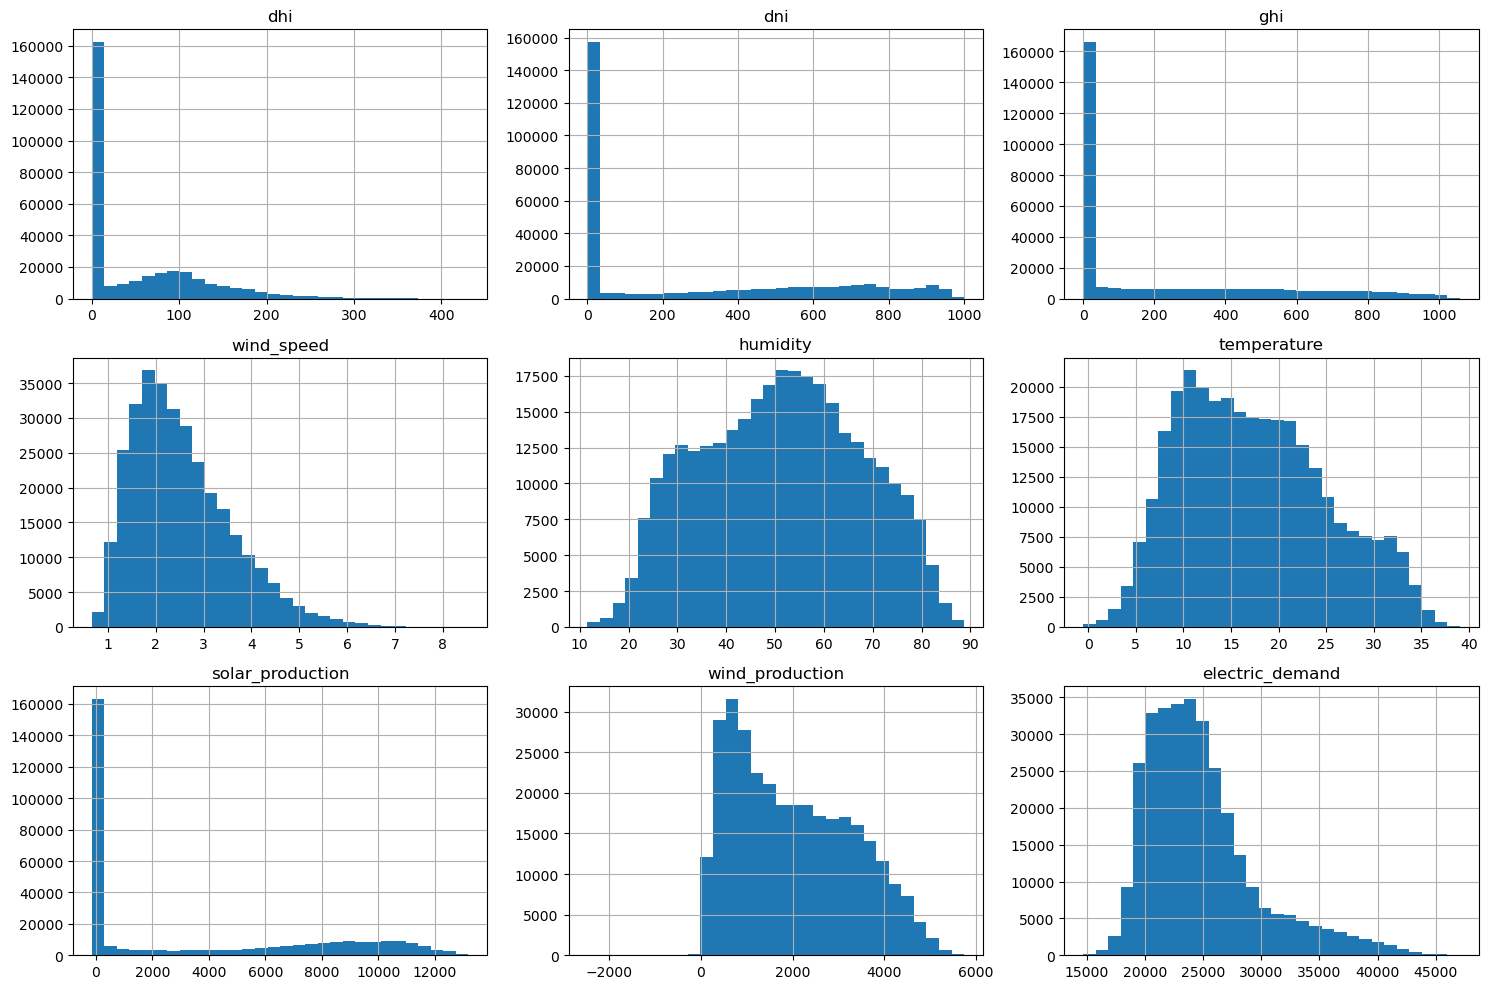

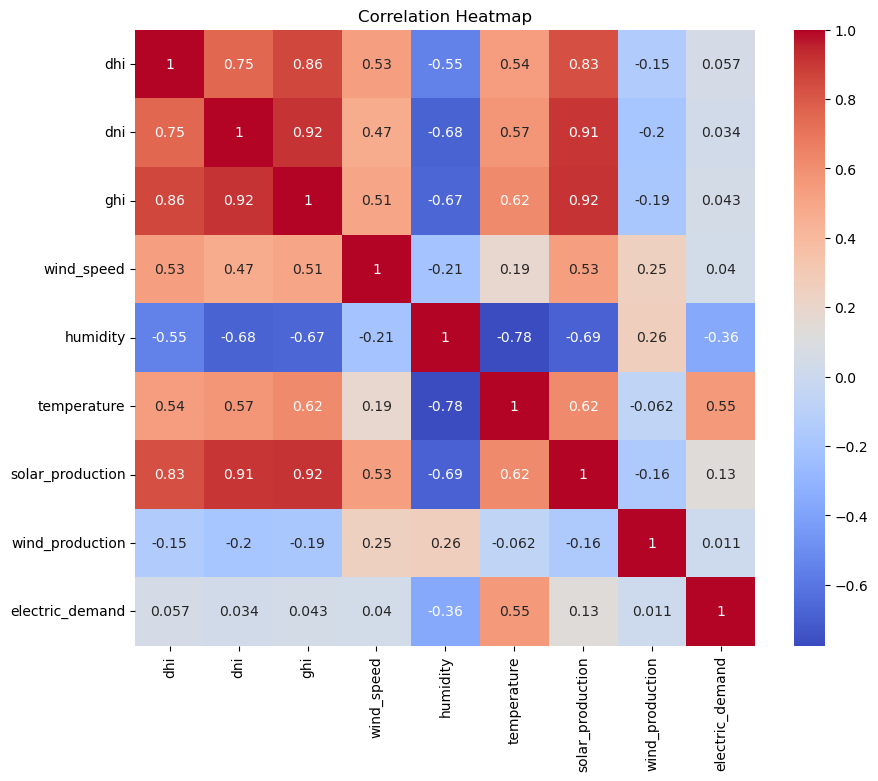

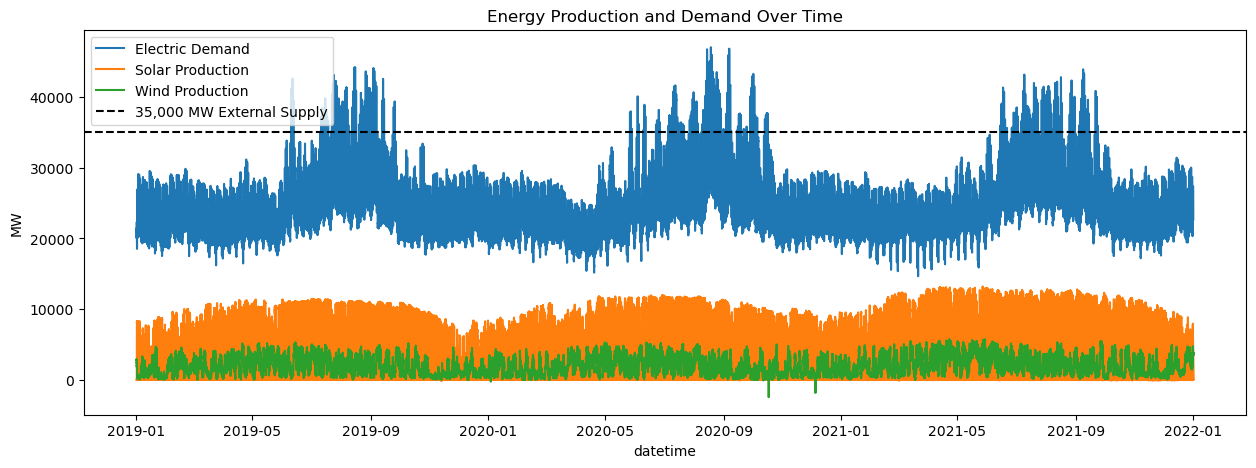

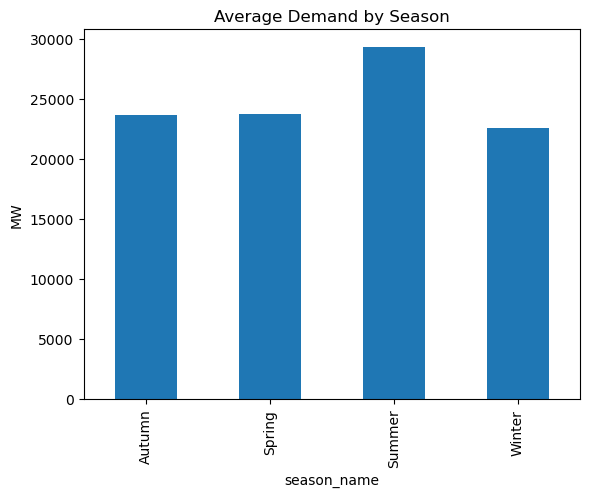

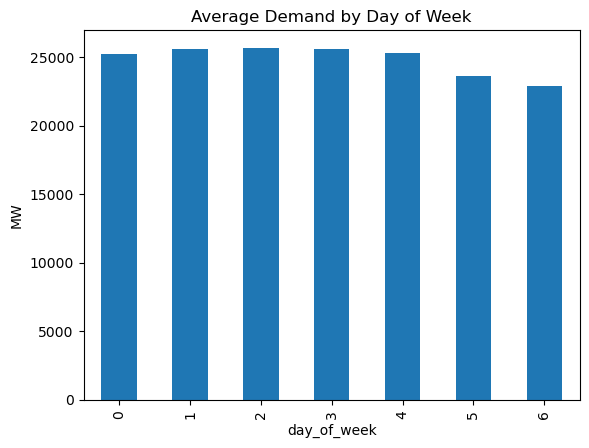

Shortage counts:
shortage
False    312229
True       3419
Name: count, dtype: int64


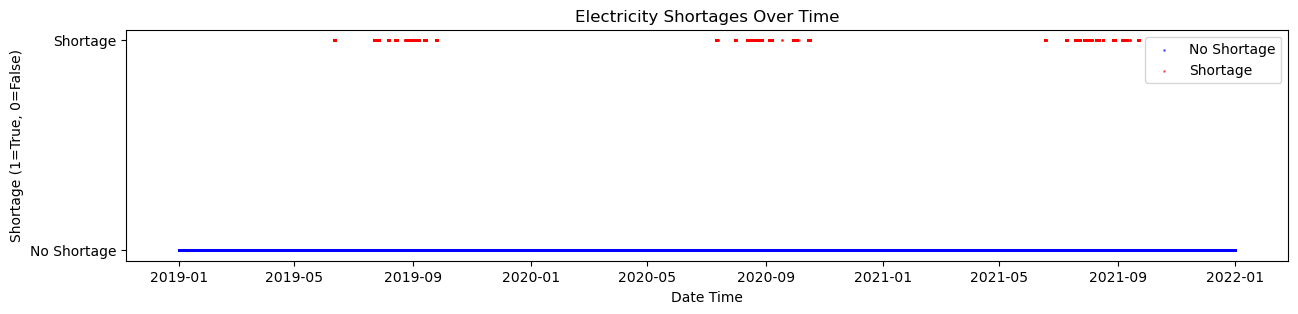

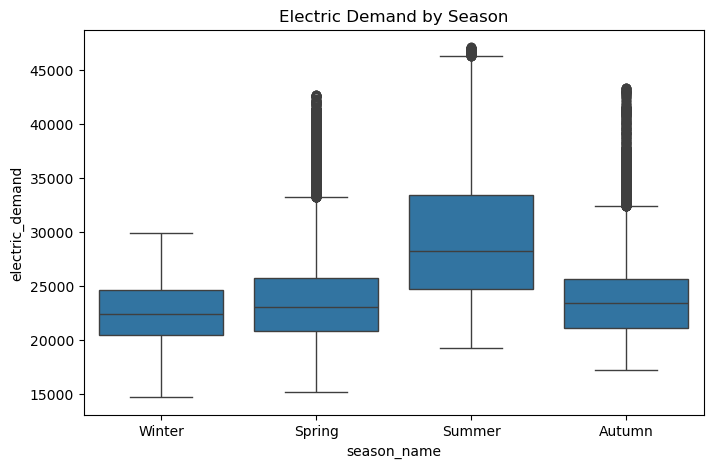

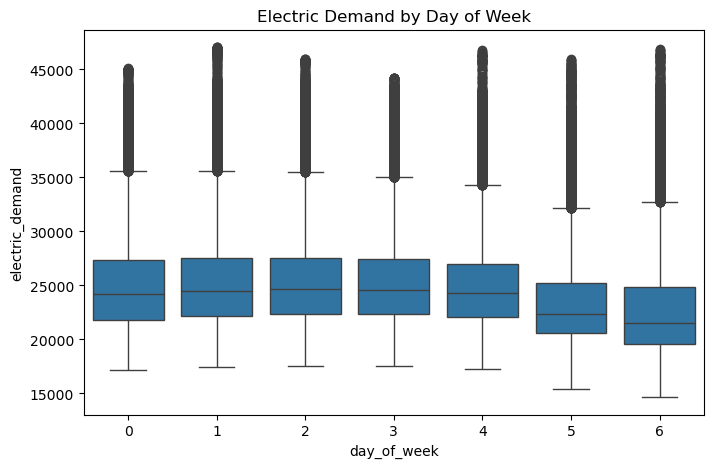

<Figure size 1000x500 with 0 Axes>

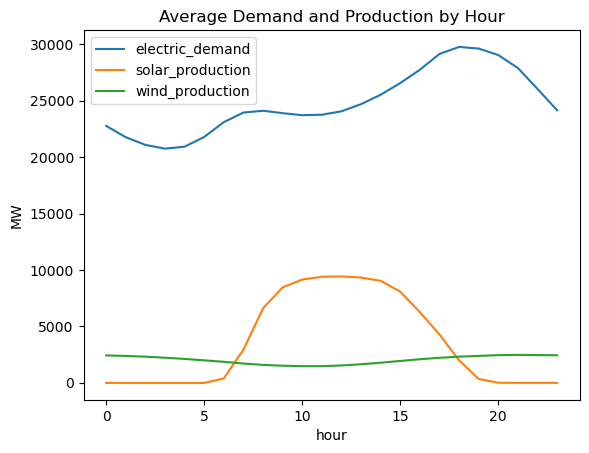

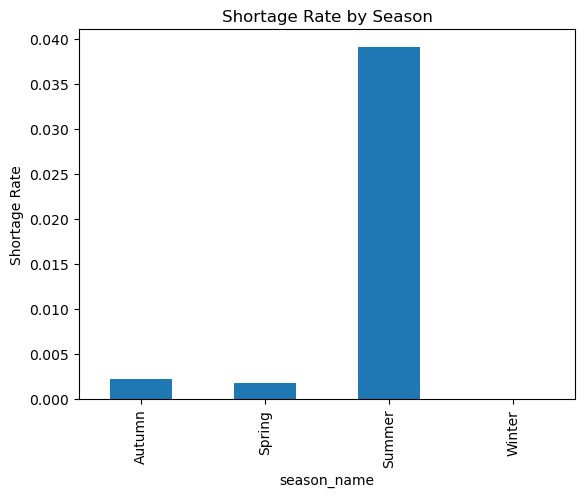

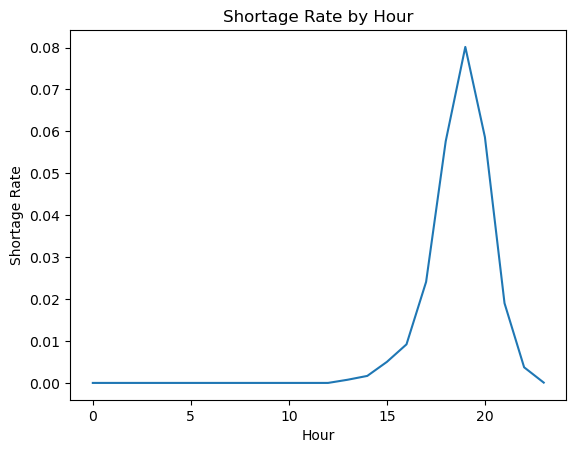

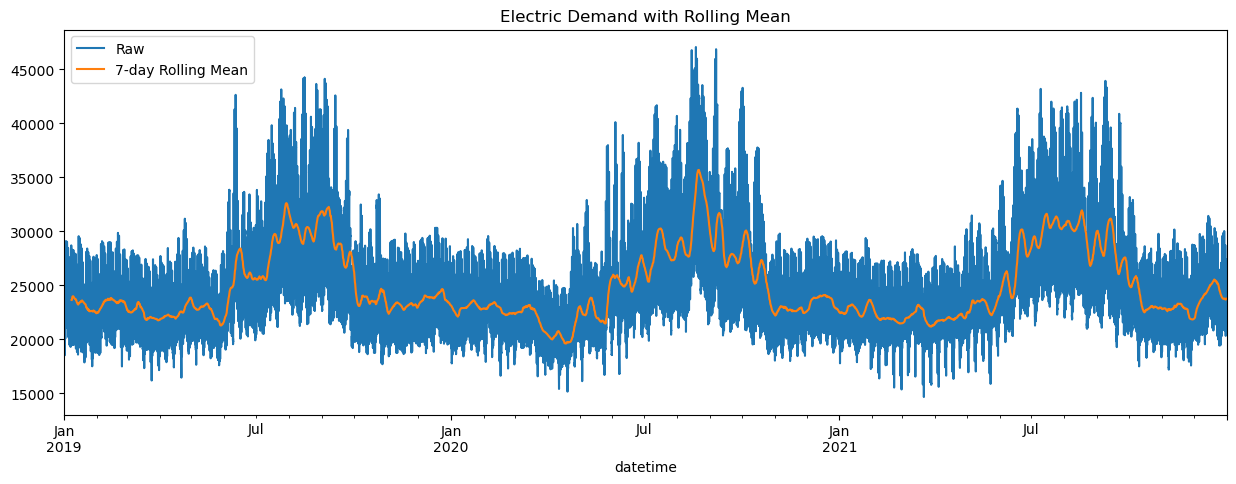

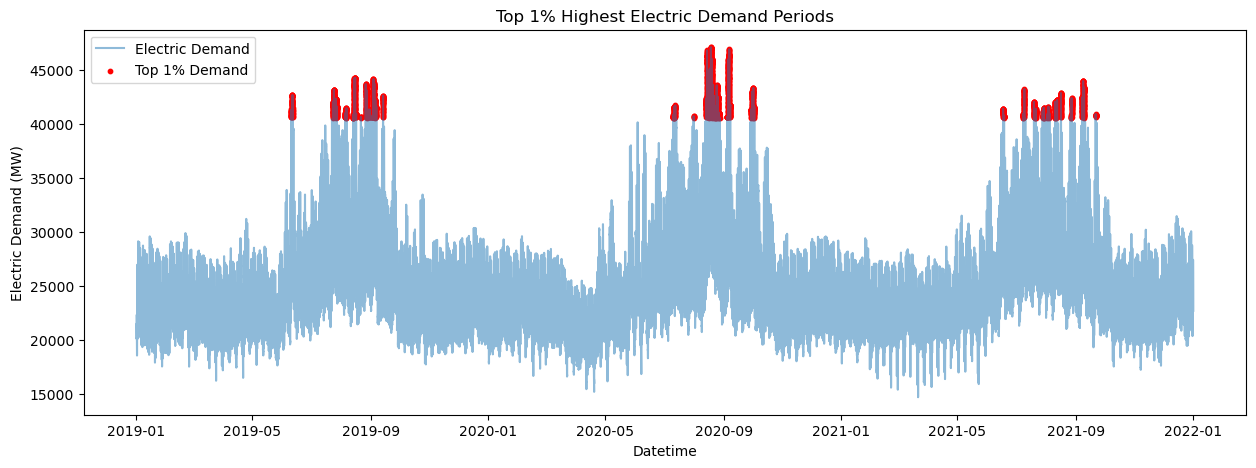

In [27]:
# --- Exploratory Data Analysis for Database.csv ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/Database.csv')

# Preview the data
display(df.head())
display(df.info())
display(df.describe())

# Drop the first unnamed column as it's just an index
df = df.iloc[:, 1:]  

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum()) # no missing values

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum()) # no duplicates

# Data explanation on the site explained that the data was already cleaned and preprocessed, so as expected, no missing values or duplicates.


# Convert Time to datetime
df['Time'] = pd.to_datetime(df['Time'].str.replace('-T', ' '))

# Rename columns for easier access
df = df.rename(columns={
    'Time': 'datetime',
    'Season': 'season',
    'Day_of_the_week': 'day_of_week',
    'DHI': 'dhi',
    'DNI': 'dni',
    'GHI': 'ghi',
    'Wind_speed': 'wind_speed',
    'Humidity': 'humidity',
    'Temperature': 'temperature',
    'PV_production': 'solar_production',
    'Wind_production': 'wind_production',
    'Electric_demand': 'electric_demand'
})

# Distribution plots for key features.
num_cols = ['dhi', 'dni', 'ghi', 'wind_speed', 'humidity', 'temperature', 
            'solar_production', 'wind_production', 'electric_demand']
df[num_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Time series plot of solar and wind production, and electricity demand
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['electric_demand'], label='Electric Demand')
plt.plot(df['datetime'], df['solar_production'], label='Solar Production')
plt.plot(df['datetime'], df['wind_production'], label='Wind Production')
plt.axhline(35000, color='black', linestyle='--', label='35,000 MW External Supply')
plt.legend()
plt.title('Energy Production and Demand Over Time')
plt.xlabel('datetime')
plt.ylabel('MW')
plt.show()

# Average demand by season - change numeric season to string for better readability
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
df['season_name'] = df['season'].map(season_map)
df.groupby('season_name')['electric_demand'].mean().plot(kind='bar', title='Average Demand by Season')
plt.ylabel('MW')
plt.show()

# Average demand by day of week
df.groupby('day_of_week')['electric_demand'].mean().plot(kind='bar', title='Average Demand by Day of Week')
plt.ylabel('MW')
plt.show()

# Identify shortages (demand > supply)
df['total_supply'] = df['solar_production'] + df['wind_production'] + 35000  # Assuming a constant 35,000 MW from external supply
df['shortage'] = df['electric_demand'] > df['total_supply']
print("Shortage counts:")
print(df['shortage'].value_counts())

# Visualize shortages over time
plt.figure(figsize=(15,3))
is_shortage = df['shortage'].astype(int) == 1
plt.scatter(df.loc[~is_shortage, 'datetime'], df.loc[~is_shortage, 'shortage'], color='blue', s=1, alpha=0.5, label='No Shortage')
plt.scatter(df.loc[is_shortage, 'datetime'], df.loc[is_shortage, 'shortage'], color='red', s=1, alpha=0.5, label='Shortage')
plt.title('Electricity Shortages Over Time')
plt.xlabel('Date Time')
plt.ylabel('Shortage (1=True, 0=False)')
plt.yticks([0, 1], ['No Shortage', 'Shortage'])
plt.legend()
plt.show()


# Boxplot: Electric demand by season
plt.figure(figsize=(8,5))
sns.boxplot(x='season_name', y='electric_demand', data=df)
plt.title('Electric Demand by Season')
plt.show()

# Boxplot: Electric demand by day of week
plt.figure(figsize=(8,5))
sns.boxplot(x='day_of_week', y='electric_demand', data=df)
plt.title('Electric Demand by Day of Week')
plt.show()


# Create hour column for hourly analysis
df['hour'] = df['datetime'].dt.hour

# Lineplot: Average demand/production by hour
plt.figure(figsize=(10,5))
df.groupby('hour')[['electric_demand', 'solar_production', 'wind_production']].mean().plot()
plt.title('Average Demand and Production by Hour')
plt.ylabel('MW')
plt.show()


# Shortage rate by season
shortage_by_season = df.groupby('season_name')['shortage'].mean()
shortage_by_season.plot(kind='bar', title='Shortage Rate by Season')
plt.ylabel('Shortage Rate')
plt.show()

# Shortage rate by hour
shortage_by_hour = df.groupby('hour')['shortage'].mean()
shortage_by_hour.plot(title='Shortage Rate by Hour')
plt.ylabel('Shortage Rate')
plt.xlabel('Hour')
plt.show()


#Rolling Means for Trend Analysis - Smooth out short-term fluctuations to see trends.
df.set_index('datetime', inplace=True)
df['demand_rolling'] = df['electric_demand'].rolling(window=2016).mean()  # 7 days if 5-min intervals

plt.figure(figsize=(15,5))
df['electric_demand'].plot(label='Raw')
df['demand_rolling'].plot(label='7-day Rolling Mean')
plt.legend()
plt.title('Electric Demand with Rolling Mean')
plt.show()
df.reset_index(inplace=True)


# Find and plot the top 1% highest demand periods.
high_demand = df[df['electric_demand'] > df['electric_demand'].quantile(0.99)]

plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['electric_demand'], label='Electric Demand', alpha=0.5)
plt.scatter(high_demand['datetime'], high_demand['electric_demand'], color='red', label='Top 1% Demand', s=10)
plt.title('Top 1% Highest Electric Demand Periods')
plt.xlabel('Datetime')
plt.ylabel('Electric Demand (MW)')
plt.legend()
plt.show()



### Baseline Model: LogisticRegression
1.  To predict the electricity shortage, I am using LogisticRegression as it is a simple, interpretable, and effective baseline model for binary classification problems like predicting electricity shortages (shortage: 1, no shortage: 0).
2. Add all the columns from the dataset as features and used newly added "shortage" feature as the target for binary classification.
3. Divided the data to train and test data with 80:20 division.
4. Looking at Confusion Matrix, predicting 0 is very good, but predicting 1 does not have good accuracy.
5. Looking at coefficients, following are the important features and this is likely due to manually adding 35000 MW external supply throughout the time, but here is the list of importance: season, temperature, day_of_week, humidity, hour and wind speed.  Other feaures seems to have not much of importance to predict the shortage.  If not much computational resource avaialble, we can probably shortlist the features used for shortage prediction.
6. The last plot shows the visual of important features.
 

Confusion Matrix:
[[62308   159]
 [  444   219]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9929    0.9975    0.9952     62467
           1     0.5794    0.3303    0.4207       663

    accuracy                         0.9904     63130
   macro avg     0.7861    0.6639    0.7080     63130
weighted avg     0.9886    0.9904    0.9892     63130


Feature Importance (Logistic Regression Coefficients):
season              1.933761
temperature         0.517547
day_of_week         0.223428
humidity            0.176747
hour                0.068300
wind_speed          0.048358
ghi                 0.008395
dhi                 0.006649
dni                 0.005146
wind_production     0.000473
solar_production    0.000271
dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


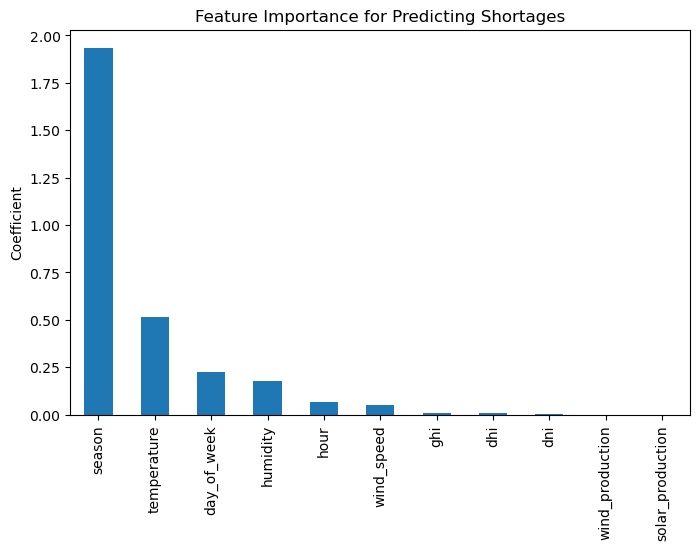

In [29]:
# Baseline Model: Predicting Electricity Shortages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Feature selection: use recent values and weather/production features
feature_cols = [
    'solar_production', 'wind_production', 'dhi', 'dni', 'ghi',
    'wind_speed', 'humidity', 'temperature', 'hour', 'season', 'day_of_week'
]
X = df[feature_cols]
y = df['shortage'].astype(int)

# Train/test split (use time-based split for time series, but here random for baseline)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Baseline model: Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Feature importance
importance = pd.Series(abs(model.coef_[0]), index=feature_cols).sort_values(ascending=False)
print("\nFeature Importance (Logistic Regression Coefficients):")
print(importance)

# Identify recurring patterns: show top features and their coefficients
plt.figure(figsize=(8,5))
importance.plot(kind='bar')
plt.title('Feature Importance for Predicting Shortages')
plt.ylabel('Coefficient')
plt.show()

### Baseline Model: SARIMA
1. Used SARIMA for forecasting electricity demand
2. Took most of data as train data and used last 30 days of the dateset as the testing data.
3. Used the simple baseline order to train SARIMA model for baseline modeling.
4. Using the model, forecasted using the test data.
5. Created a plot to visualize the train, test and forecast data which show the forecast confidence isn't as high.  The model probably can be tuned more to get higher confidence and accuracy.
6. Printed the forecast MAE and MAPE to show the accuracy of the forecast.  


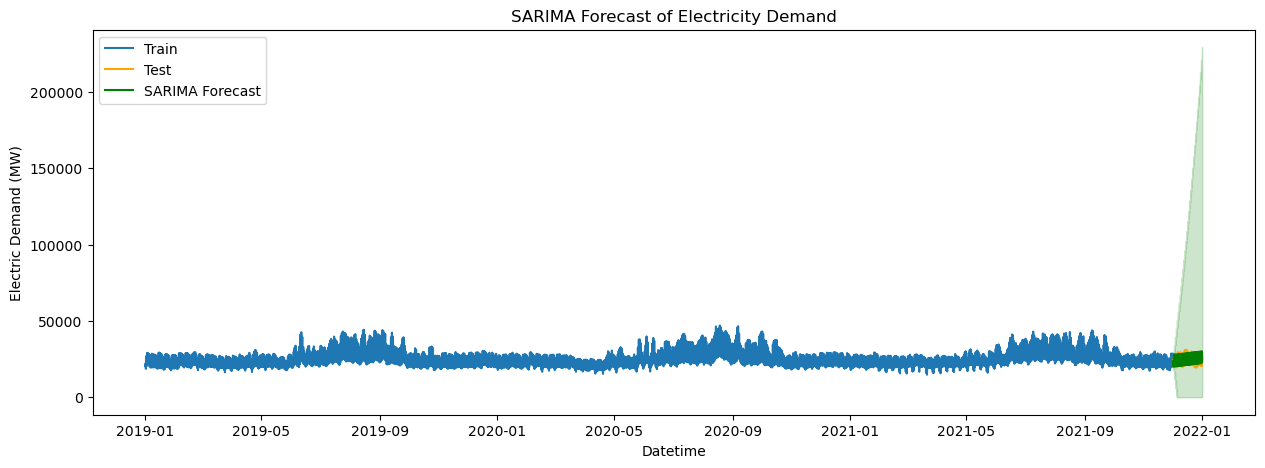

Test MAE: 1396.87 MW
Test MAPE: 5.80%


In [32]:
# Baseline SARIMA model for forecasting electricity demand

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime is index and sorted
df_sarima = df.copy() 
df_sarima = df_sarima.set_index('datetime').sort_index()

# Resample to hourly mean for faster computation (optional, can use 5-min if desired)
y = df_sarima['electric_demand'].resample('h').mean()

# Split into train/test (last 30 days as test)
train = y.iloc[:-24*30]
test = y.iloc[-24*30:]

# Fit SARIMA model (simple baseline order, can be tuned)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,24), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = model.fit(disp=False)

# Forecast
forecast = sarima_result.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(15,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast_mean, label='SARIMA Forecast', color='green')
ci_lower = forecast_ci.iloc[:, 0].clip(lower=0)
ci_upper = forecast_ci.iloc[:, 1]
plt.fill_between(test.index, ci_lower, ci_upper, color='green', alpha=0.2)
plt.title('SARIMA Forecast of Electricity Demand')
plt.xlabel('Datetime')
plt.ylabel('Electric Demand (MW)')
plt.legend()
plt.show()

# Print simple accuracy metric
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, forecast_mean)
print(f"Test MAE: {mae:.2f} MW")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = (abs(test - forecast_mean) / test).mean() * 100
print(f"Test MAPE: {mape:.2f}%")
